In [3]:
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from IPython.display import Image, display


<img src="https://i.imgur.com/49FNOHj.jpg">


In [11]:
colors = pd.read_csv('data/colors.csv')
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [12]:
colors['name'].nunique()


135

In [13]:
colors.groupby('is_trans').count()


,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [14]:
colors.is_trans.value_counts()


,count
is_trans,
f,107
t,28


In [15]:
sets = pd.read_csv('data/sets.csv')
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [16]:
sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


In [17]:
sets.sort_values('year').head()

,set_num,name,year,theme_id,num_parts
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9534,700.2-1,Large Gift Set (ABB),1949,365,178


In [18]:
sets[sets['year'] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [19]:
sets.sort_values('num_parts', ascending=False).head(5)

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


In [20]:
import matplotlib.pyplot as plt

In [29]:
sets_by_year = sets.groupby('year').count()
sets_by_year['set_num'].head()

,set_num
year,
1949,5
1950,6
1953,4
1954,14
1955,28


In [30]:
sets_by_year['set_num'].tail()

,set_num
year,
2017,786
2018,816
2019,840
2020,674
2021,3


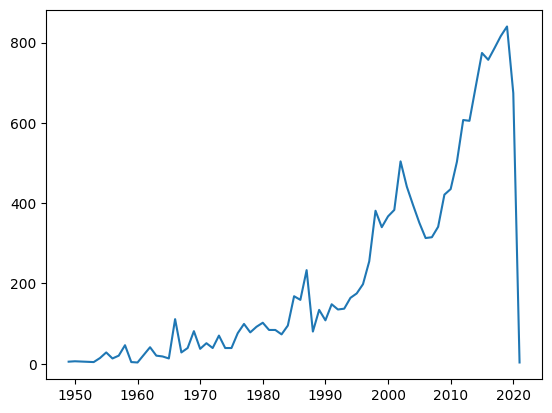

In [31]:
plt.plot(sets_by_year.index, sets_by_year.set_num)


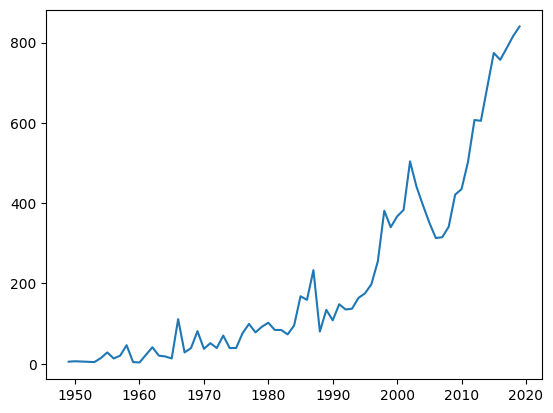

In [36]:
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])


In [37]:
themes_by_year = sets.groupby('year').agg({'theme_id':pd.Series.nunique})

themes_by_year.rename(columns = {'theme_id': 'nr themes'}, inplace = True)
themes_by_year.head()

,nr themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [38]:
themes_by_year.tail()

,nr themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


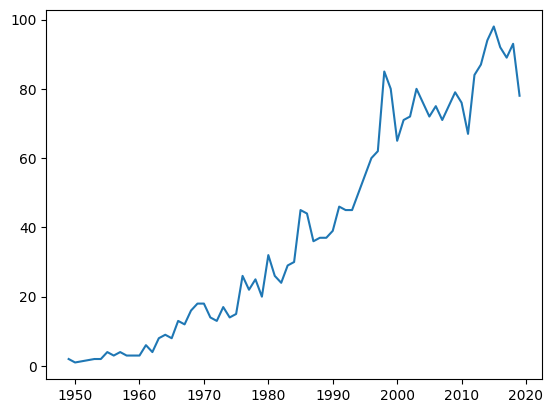

In [42]:
plt.plot(themes_by_year.index[:-2], themes_by_year.values[:-2])


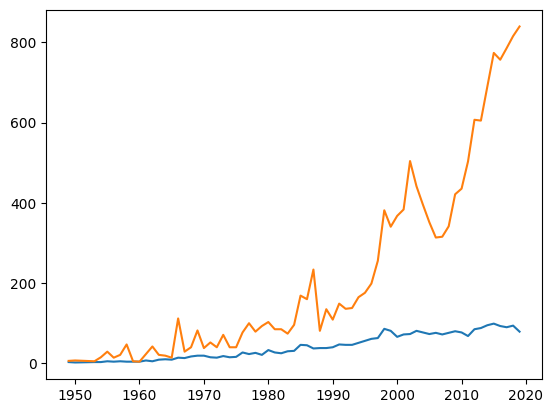

In [45]:
plt.plot(themes_by_year.index[:-2], themes_by_year.values[:-2])
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

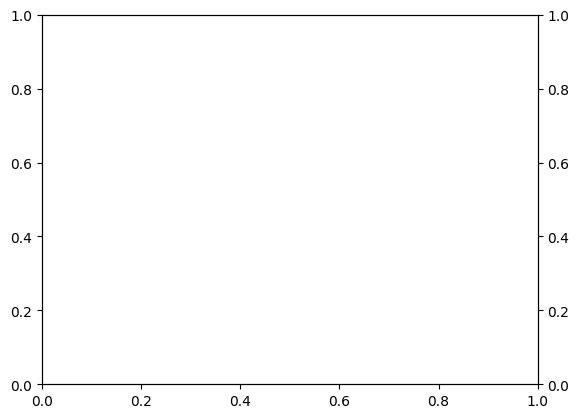

In [46]:
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx()

Text(0, 0.5, 'Number of Themes')

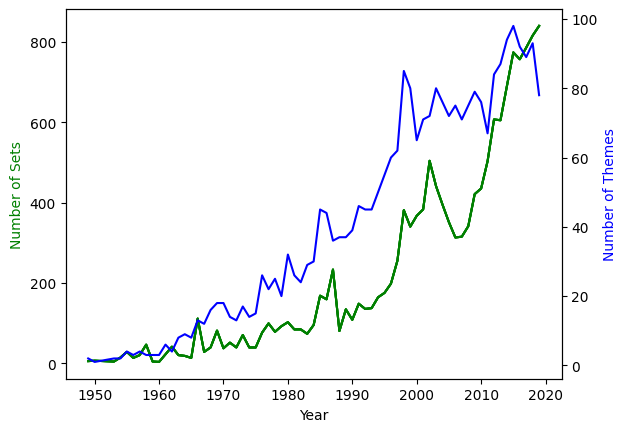

In [53]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(sets_by_year.index[:-2], sets_by_year.values[:-2], color='g')
ax2.plot(themes_by_year.index[:-2], themes_by_year.values[:-2], 'b')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets', color='green')
ax2.set_ylabel('Number of Themes', color='blue')

In [54]:
parts_per_set = sets.groupby('year').agg({'num_parts': pd.Series.mean})


In [55]:
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


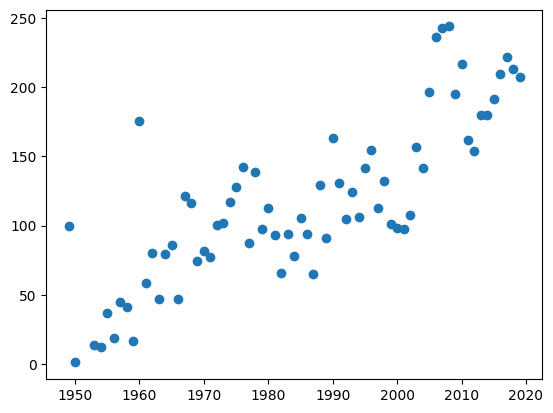

In [58]:
plt.scatter(parts_per_set.index[:-2], parts_per_set.values[:-2])

In [59]:
set_theme_count = sets ["theme_id"].value_counts()
set_theme_count[:5]

,count
theme_id,
158,753
501,656
494,398
435,356
503,329


<img src="https://i.imgur.com/Sg4lcjx.png">


In [61]:
set_theme_count = pd. DataFrame({'id': set_theme_count.index,
'set_count':
set_theme_count.values})
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [64]:
themes_df = pd.read_csv('data/themes.csv')


In [68]:
merged_df = pd.merge(set_theme_count, themes_df, on='id')
merged_df[:3]

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN


<BarContainer object of 10 artists>

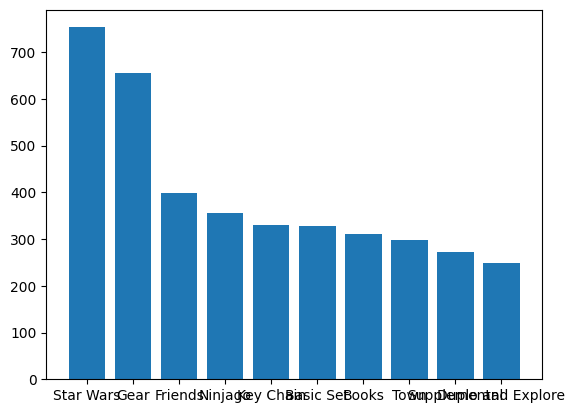

In [70]:
plt.bar(merged_df.name[:10], merged_df.set_count[:10])

<BarContainer object of 10 artists>

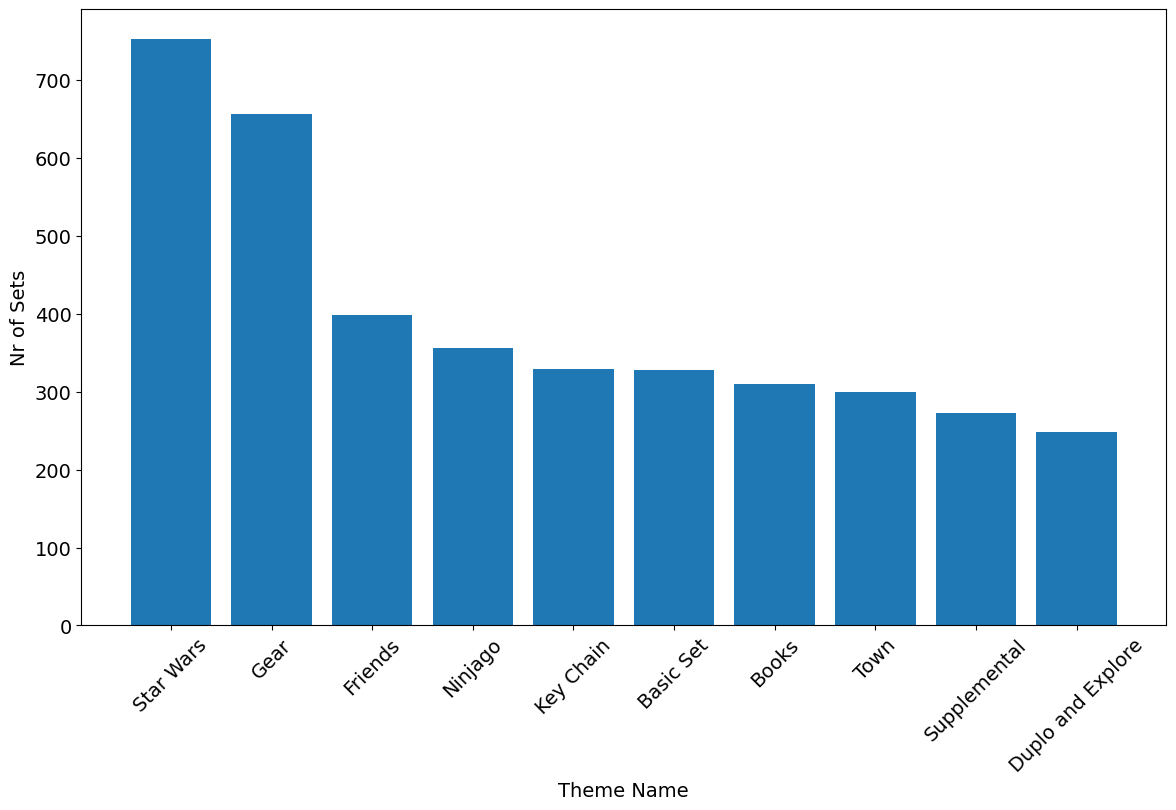

In [71]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merged_df.name[:10], merged_df.set_count[:10])